# Linear Regression Bike Assignment

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1: Reading and Understanding the Data

Let's start with importing all the required libraries for the analysis.

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [373]:
# read data set

daydf = pd.read_csv("day.csv")

daydf.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [374]:
# To check dataset shape rows and columns 
daydf.shape

(730, 16)

In [375]:
# to check the datatypes of columns of dataset
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [376]:
daydf.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [377]:
# Check and verify if any null values are exists in data set

daydf.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Step2: Cleaning Data

In [378]:
# As per observation , instant column is is serial number , so no use for data analysis, we can drop this column from dataset
daydf = daydf.drop('instant',axis=1)

In [379]:
# Again checking the shape of dataset
daydf.shape

(730, 15)

In [380]:
daydf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [381]:
# We have column dteday and yr month are having same data so we can drop dteday to avoid confusion

daydf = daydf.drop('dteday',axis=1)

In [382]:
# Again checking the shape of dataset
daydf.shape

(730, 14)

In [383]:
daydf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [384]:
# As per observation we came to know that casual+registered	column total value is equal to cnt column.
# Hence we can remove these unwanted columns

daydf = daydf.drop(['casual','registered'],axis=1)

In [385]:
# Again checking the shape of dataset
daydf.shape

(730, 12)

In [386]:
daydf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [387]:
# checking again the datatypes of columns of dataset
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.5 KB


In [326]:
# From the above data set checking how many values are present in columns season,weathersit,mnth and weekday 

# Step 3 - Preparing the Data for Modeling

- Encoding : 
       -Converting binary vars to 1/0
       -Other Categorial var to dummy vars
- Splitting into train and test
- Rescalling of variables

In [388]:
daydf.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

- As per above data Four seasons are present those would be spring,summer,fall and winter

In [389]:
daydf.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

- As per above data weathersit should be good,moderate,bad,severe weather

In [390]:
daydf.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

- As per above data there would be 12 months Jan,Feb..Dec

In [391]:
daydf.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

- As per above data there would be 7 week days those are Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday

- Now we will replace season,weekday and weathersit with appropriate values as above mentioned 

In [392]:
daydf.season.replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
daydf.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [393]:
daydf.weathersit.replace({1:"Clear_Few_Clouds",2:"Mist_Few_Clouds",3:"Light_Snow_Light Rain_Thunderstorm_Scattered clouds",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace = True)
daydf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,Mist_Few_Clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_Few_Clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [394]:
daydf.weekday.replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [395]:
daydf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Few_Clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Few_Clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


In [396]:
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 59.9+ KB


In [397]:
daydf.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,3.450215,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,1.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,4.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,7.000000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,10.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,12.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


# EDA
- Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

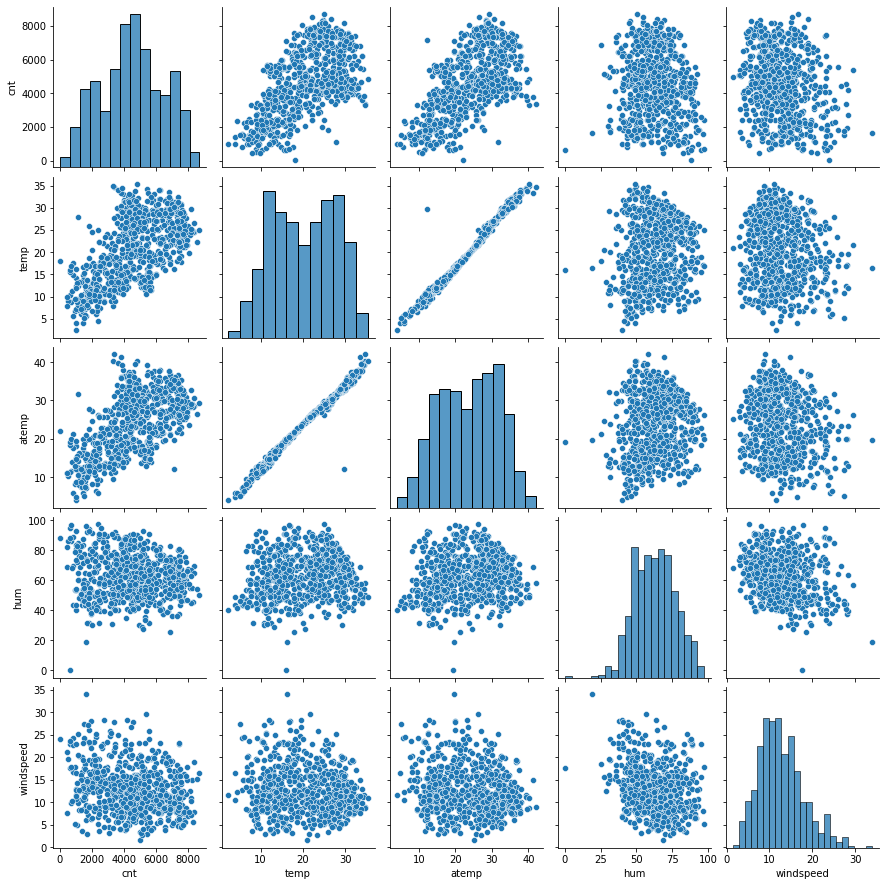

In [398]:
plt.figure(figsize = (15,30))
sns.pairplot(data=daydf,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

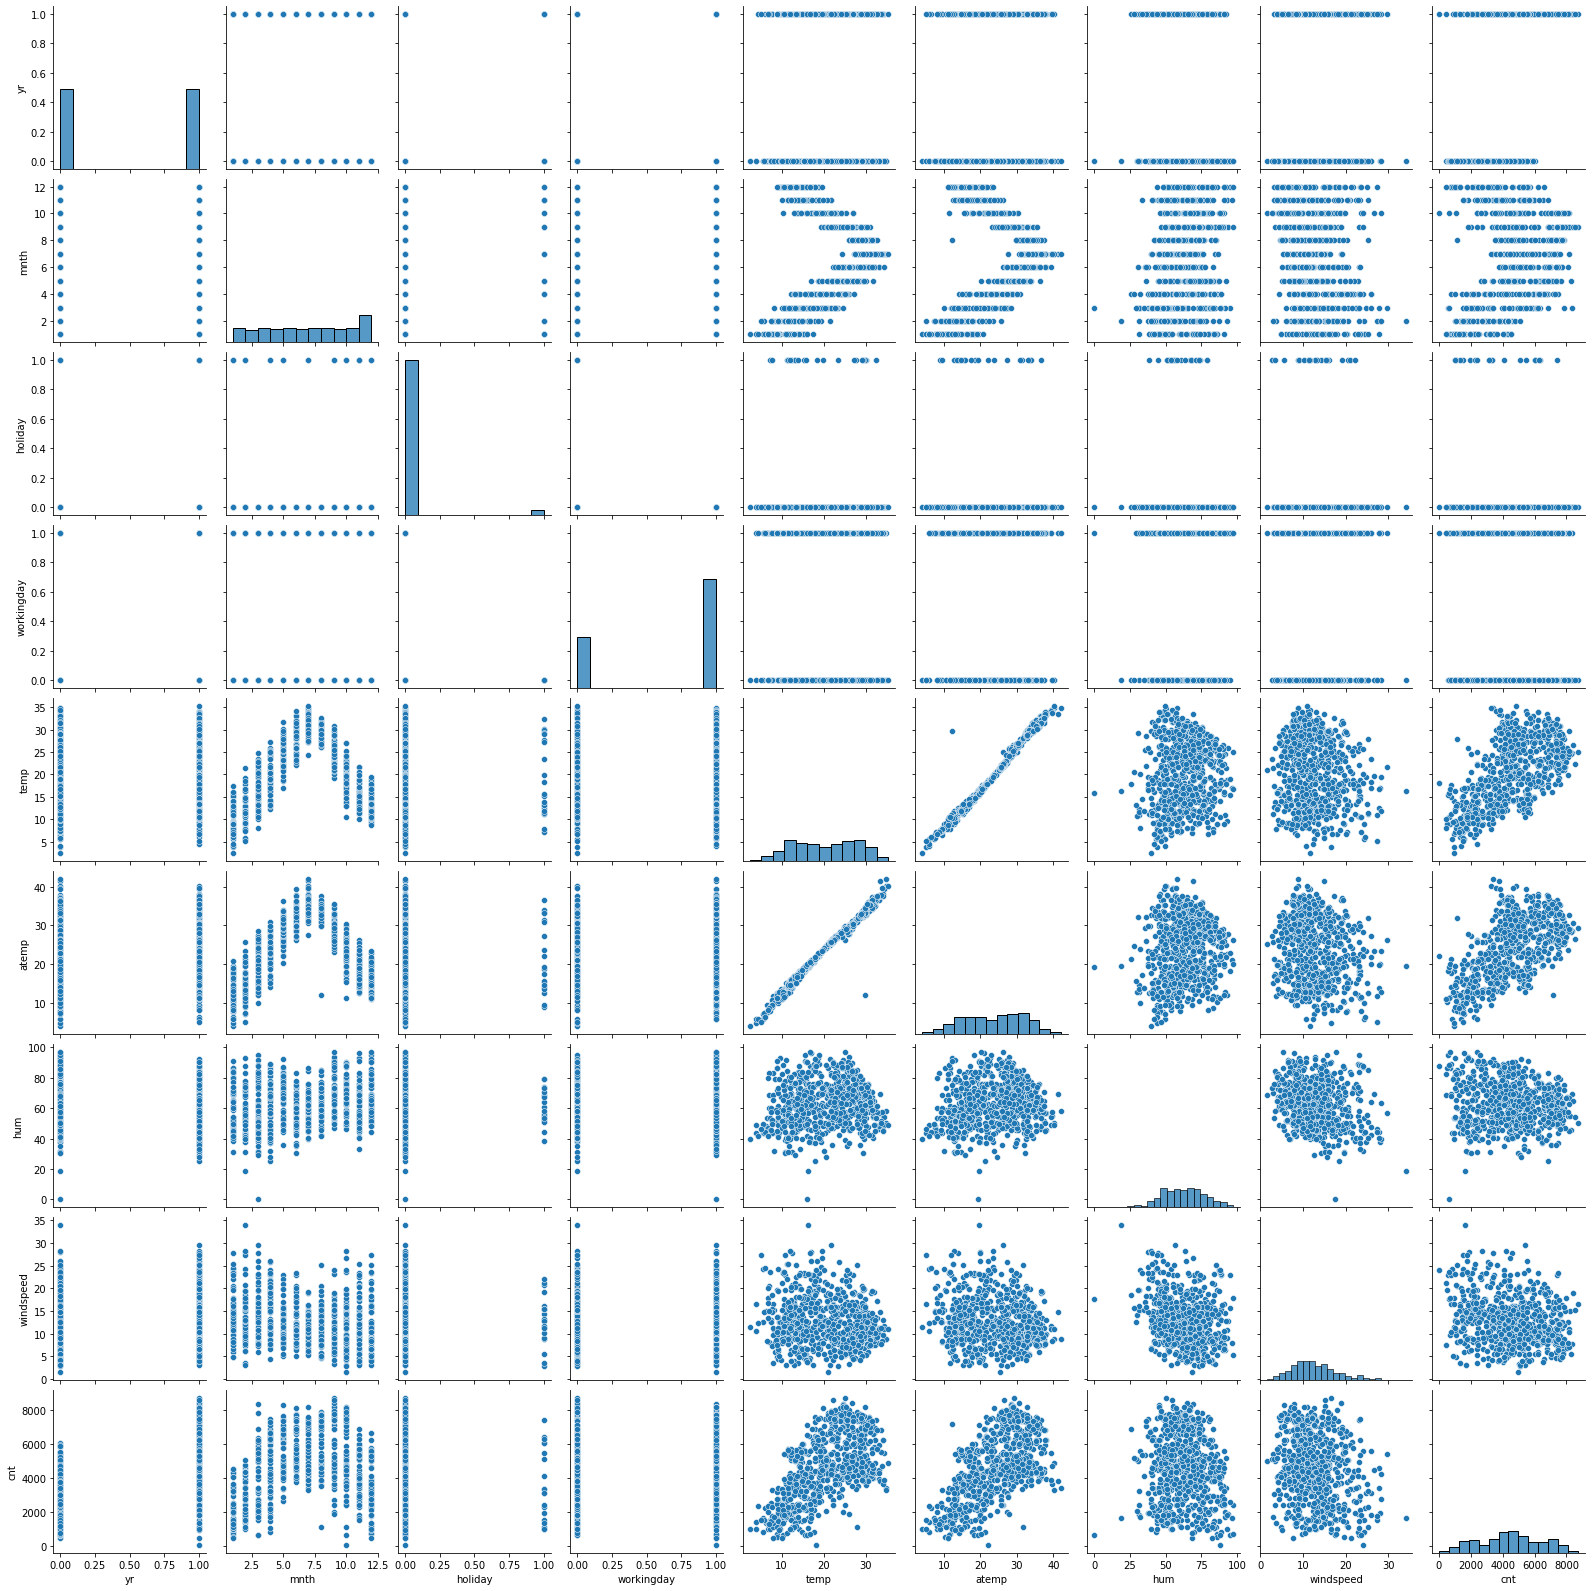

In [399]:
# Visualising numeric variables

sns.pairplot(daydf)
plt.show()

# Observation from above pair plot 
- temp and atemp has the highest corelation with the target variable cnt
- And temp and atemp are highly co-related with each other

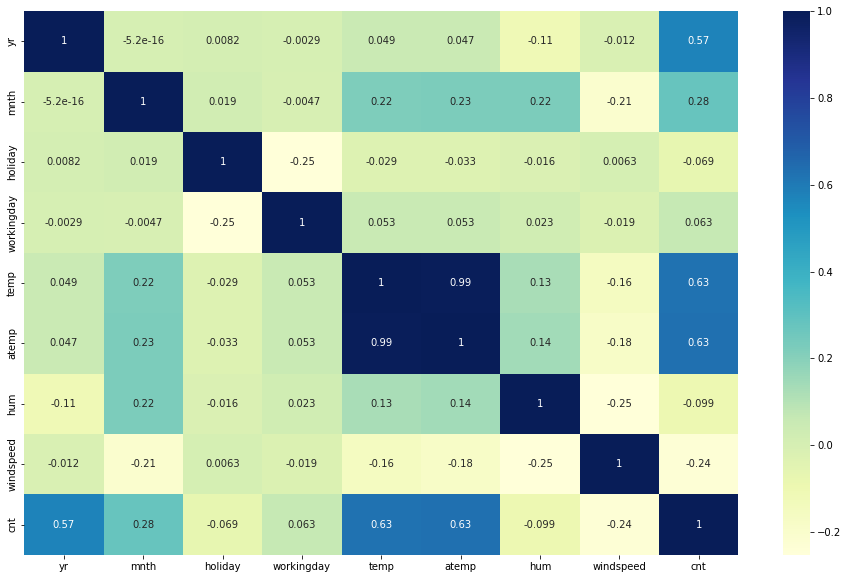

In [400]:
# Now checking the correlation between the varibales with help of Heatmap

plt.figure(figsize = (16, 10))
sns.heatmap(daydf.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [401]:
daydf.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist_Few_Clouds,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_Few_Clouds,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few_Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few_Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few_Clouds,9.305237,11.46350,43.6957,12.522300,1600


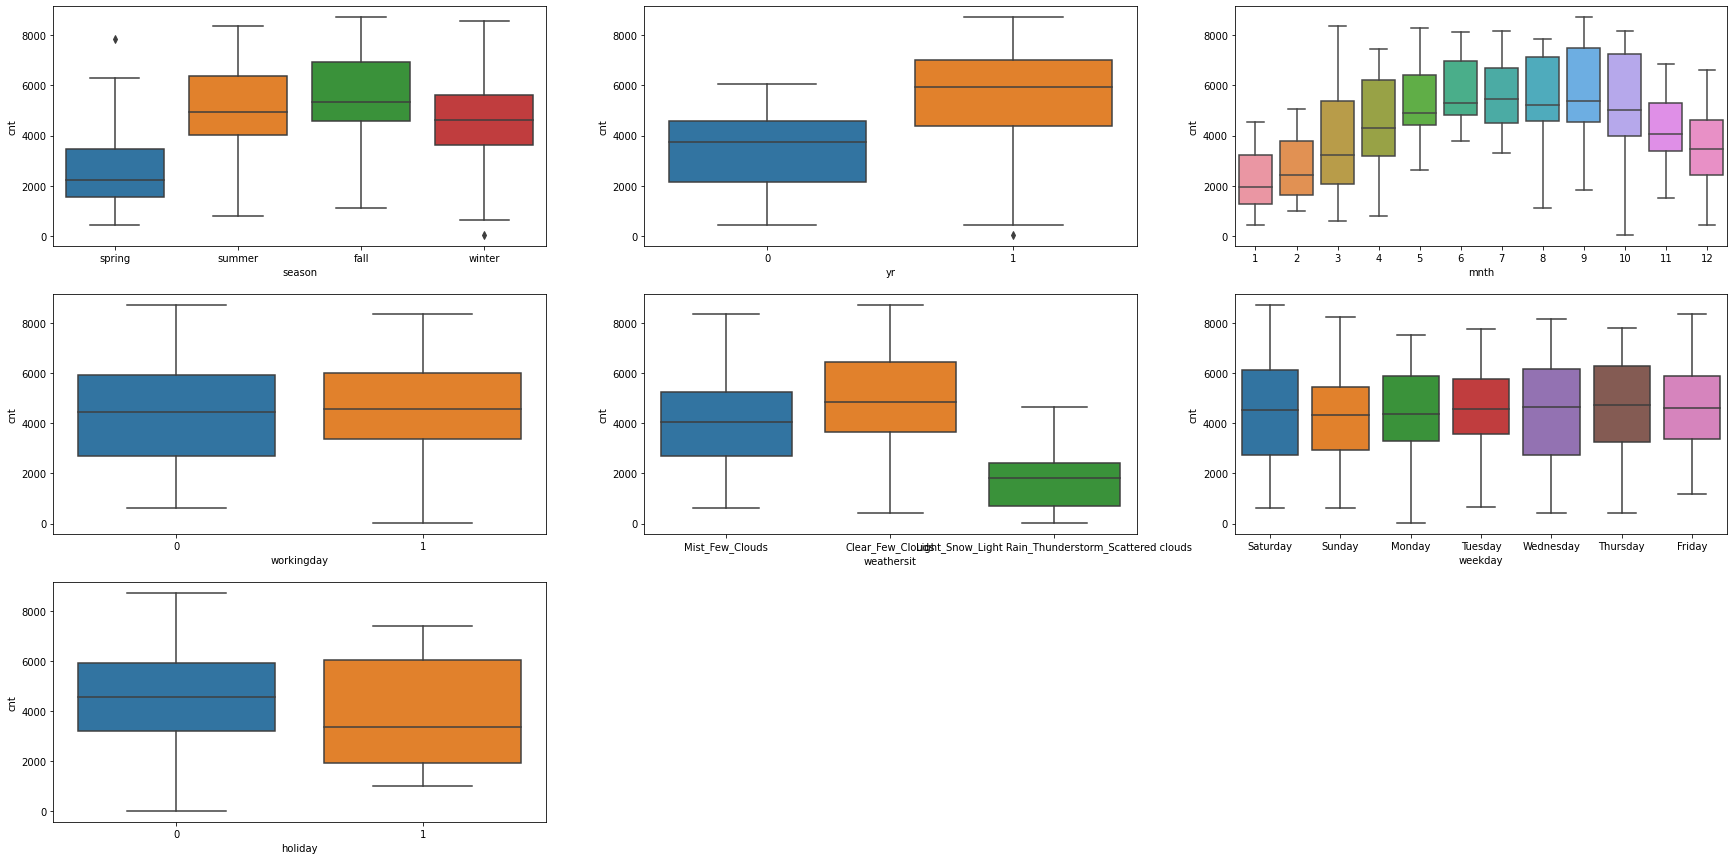

In [402]:
#Visualising categorical Variables to understand data better
#Using Boxplot for categorical variables
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = daydf)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = daydf)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = daydf)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = daydf)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = daydf)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = daydf)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = daydf)
plt.show()

# Observation from the above boxplot
- Season: 3:fall has highest demand for rental bikes
- We can see that demand for next year has grown
- Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
- When there is a holiday, demand has decreased.
- Weekday is not giving clear picture abount demand.
- The good weathershit has highest demand
- During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

In [403]:
#Convert variables to object type
daydf['mnth']=daydf['mnth'].astype(object)
daydf['season']=daydf['season'].astype(object)
daydf['weathersit']=daydf['weathersit'].astype(object)
daydf['weekday']=daydf['weekday'].astype(object)
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 57.1+ KB


# Step 4: Data Preparation for Linear Regression

In [404]:
# Create dummy variables for all categorical variables
# Dropping the first columns as (p-1) dummies can explain p categories.

Season_condition = pd.get_dummies(daydf['season'],drop_first=True)
Weather_condition = pd.get_dummies(daydf['weathersit'],drop_first=True) 
Day_of_week = pd.get_dummies(daydf['weekday'],drop_first=True)
Month = pd.get_dummies(daydf['mnth'],drop_first=True)

In [405]:
Season_condition
Season_condition
Day_of_week
Month

,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


In [406]:
daydf=pd.concat([daydf,Season_condition],axis=1)
daydf=pd.concat([daydf,Weather_condition],axis=1)
daydf=pd.concat([daydf,Day_of_week],axis=1)
daydf=pd.concat([daydf,Month],axis=1)
daydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   season                                               730 non-null    object 
 1   yr                                                   730 non-null    int64  
 2   mnth                                                 730 non-null    object 
 3   holiday                                              730 non-null    int64  
 4   weekday                                              730 non-null    object 
 5   workingday                                           730 non-null    int64  
 6   weathersit                                           730 non-null    object 
 7   temp                                                 730 non-null    float64
 8   atemp                                                730 non-null    f

In [407]:
daydf.shape

(730, 34)

In [408]:
#Now we can delete the orginal columns season,weathersit,weekday,mnth

daydf = daydf.drop(['season','weathersit','weekday','mnth'],axis=1)

In [409]:
daydf.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [410]:
daydf.shape

(730, 30)

## Splitting data into train and test

In [411]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(daydf, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [412]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,1,0,0,0,0,0,0,0,0


In [413]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,1,0,0,0,0,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,1,0,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [414]:
df_train.columns

Index([                                                 'yr',
                                                   'holiday',
                                                'workingday',
                                                      'temp',
                                                     'atemp',
                                                       'hum',
                                                 'windspeed',
                                                       'cnt',
                                                    'spring',
                                                    'summer',
                                                    'winter',
       'Light_Snow_Light Rain_Thunderstorm_Scattered clouds',
                                           'Mist_Few_Clouds',
                                                    'Monday',
                                                  'Saturday',
                                                    'Sunday',
        

### Rescaling the Features 

1. Min-Max scaling (Normalisation) between 0 and 1 


In [415]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [416]:
num_vars=['atemp','temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [417]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,1,0,0,0,0,0,0,0,0


In [418]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [419]:
#CREATING X AND Y
y_train = df_train.pop('cnt')
X_train = df_train

In [420]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [421]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,1,0,0,0,0,0,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [422]:
#BUILDING MODEL USING STATSMODEL:

import statsmodels.api as sm

## VIF

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
# We initaially use the below varibles to build our model and we will use mixed approach to build model using RFE

In [423]:
# Importing required libraries

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [424]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)          
rfe = rfe.fit(X_train, y_train)

In [425]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 14),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light_Snow_Light Rain_Thunderstorm_Scattered clouds', True, 1),
 ('Mist_Few_Clouds', True, 1),
 ('Monday', False, 13),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 10),
 ('Wednesday', False, 15),
 (2, False, 9),
 (3, False, 2),
 (4, False, 4),
 (5, False, 3),
 (6, False, 5),
 (7, False, 6),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 7),
 (12, False, 8)]

In [426]:
col = X_train.columns[rfe.support_]
col

Index([                                                 'yr',
                                                   'holiday',
                                                'workingday',
                                                      'temp',
                                                       'hum',
                                                 'windspeed',
                                                    'summer',
                                                    'winter',
       'Light_Snow_Light Rain_Thunderstorm_Scattered clouds',
                                           'Mist_Few_Clouds',
                                                  'Saturday',
                                                    'Sunday',
                                                           8,
                                                           9,
                                                          10],
      dtype='object')

In [427]:
X_train.columns[~rfe.support_]

Index([    'atemp',    'spring',    'Monday',  'Thursday',   'Tuesday',
       'Wednesday',           2,           3,           4,           5,
                 6,           7,          11,          12],
      dtype='object')

In [428]:
X_train_rfe = X_train[col]

In [429]:
# import statsmodels for building model
import statsmodels.api as sm  

In [430]:
# add Constant
X_train_sm = sm.add_constant(X_train_rfe)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.24e-192
Time:                        15:03:13   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.1639      0.022      7.510      0.000       0.121       0.207
yr                                                      0.2292      0.008     28.743      0.000       0.213       0.245
holiday                                                -0.0252      0.021     -1.219      0.223      -0.066       0.015
workingday                                              0.0750      0.009      8.571      0.000       0.058       0.092
temp                                                    0.5301      0.022     24.136      0.000       0.487       0.573
hum                                                    -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed                                              -0.1857      0.025     -7.359      0.000      -0.235      -0.136
summer                                                  0.1039      0.011      9.680      0.000       0.083       0.125
winter                                                  0.1348      0.012     11.316      0.000       0.111       0.158
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
Mist_Few_Clouds                                        -0.0582      0.010     -5.618      0.000      -0.079      -0.038
Saturday                                                0.0835      0.011      7.679      0.000       0.062       0.105
Sunday                                                  0.0306      0.011      2.666      0.008       0.008       0.053
8                                                       0.0560      0.016      3.478      0.001       0.024       0.088
9                                                       0.1255      0.016      7.783      0.000       0.094       0.157
10                                                      0.0411      0.017      2.403      0.017       0.007       0.075
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                     1.02e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.45e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [431]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,workingday,31.44
10,Saturday,7.77
11,Sunday,7.65
1,holiday,2.14
4,hum,1.88
7,winter,1.72
3,temp,1.59
9,Mist_Few_Clouds,1.57
14,10,1.49
12,8,1.46


In [432]:
# # As per our observation from VIF values the below columns values come has high VIF hence droping from the X_train
# workingday

X = X.drop(['workingday'],axis=1)

In [433]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.24e-192
Time:                        15:06:04   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2389      0.027      8.917      0.000       0.186       0.292
yr                                                      0.2292      0.008     28.743      0.000       0.213       0.245
holiday                                                -0.1002      0.025     -3.961      0.000      -0.150      -0.050
temp                                                    0.5301      0.022     24.136      0.000       0.487       0.573
hum                                                    -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed                                              -0.1857      0.025     -7.359      0.000      -0.235      -0.136
summer                                                  0.1039      0.011      9.680      0.000       0.083       0.125
winter                                                  0.1348      0.012     11.316      0.000       0.111       0.158
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
Mist_Few_Clouds                                        -0.0582      0.010     -5.618      0.000      -0.079      -0.038
Saturday                                                0.0086      0.011      0.771      0.441      -0.013       0.030
Sunday                                                 -0.0444      0.012     -3.850      0.000      -0.067      -0.022
8                                                       0.0560      0.016      3.478      0.001       0.024       0.088
9                                                       0.1255      0.016      7.783      0.000       0.094       0.157
10                                                      0.0411      0.017      2.403      0.017       0.007       0.075
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [434]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,hum,14.77
2,temp,9.88
4,windspeed,3.64
6,winter,2.27
8,Mist_Few_Clouds,2.15
0,yr,2.02
5,summer,1.83
13,10,1.61
11,8,1.60
12,9,1.34


In [435]:
# # As per our observation from VIF values the below columns values come has high VIF hence droping from the X_train
# hum

X = X.drop(['hum'],axis=1)

In [436]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          6.16e-189
Time:                        15:06:54   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.1420      0.017      8.471      0.000       0.109       0.175
yr                                                      0.2329      0.008     28.799      0.000       0.217       0.249
holiday                                                -0.1018      0.026     -3.944      0.000      -0.152      -0.051
temp                                                    0.5099      0.022     23.236      0.000       0.467       0.553
windspeed                                              -0.1532      0.025     -6.203      0.000      -0.202      -0.105
summer                                                  0.1008      0.011      9.226      0.000       0.079       0.122
winter                                                  0.1267      0.012     10.544      0.000       0.103       0.150
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.2942      0.025    -12.009      0.000      -0.342      -0.246
Mist_Few_Clouds                                        -0.0854      0.009     -9.839      0.000      -0.102      -0.068
Saturday                                                0.0106      0.011      0.932      0.352      -0.012       0.033
Sunday                                                 -0.0475      0.012     -4.045      0.000      -0.070      -0.024
8                                                       0.0542      0.016      3.305      0.001       0.022       0.086
9                                                       0.1189      0.016      7.259      0.000       0.087       0.151
10                                                      0.0371      0.017      2.132      0.033       0.003       0.071
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.937
Skew:                          -0.704   Prob(JB):                     2.30e-39
Kurtosis:                       5.528   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [437]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,temp,5.22
3,windspeed,3.22
0,yr,2.00
5,winter,1.96
4,summer,1.82
10,8,1.60
12,10,1.60
7,Mist_Few_Clouds,1.49
11,9,1.34
8,Saturday,1.22


In [438]:
# # As per our observation from VIF values VIF > 2 hence we need drop temp column as well

X = X.drop(['temp'],axis=1)

In [439]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     83.87
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.91e-111
Time:                        15:10:28   Log-Likelihood:                 320.78
No. Observations:                 510   AIC:                            -615.6
Df Residuals:                     497   BIC:                            -560.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.4139      0.017     23.883      0.000       0.380       0.448
yr                                                      0.2501      0.012     21.507      0.000       0.227       0.273
holiday                                                -0.1275      0.037     -3.426      0.001      -0.201      -0.054
windspeed                                              -0.2503      0.035     -7.122      0.000      -0.319      -0.181
summer                                                  0.1671      0.015     10.968      0.000       0.137       0.197
winter                                                  0.0813      0.017      4.750      0.000       0.048       0.115
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3074      0.035     -8.693      0.000      -0.377      -0.238
Mist_Few_Clouds                                        -0.1158      0.012     -9.353      0.000      -0.140      -0.091
Saturday                                                0.0013      0.016      0.082      0.935      -0.031       0.033
Sunday                                                 -0.0490      0.017     -2.893      0.004      -0.082      -0.016
8                                                       0.2213      0.021     10.386      0.000       0.179       0.263
9                                                       0.2432      0.022     10.887      0.000       0.199       0.287
10                                                      0.1145      0.025      4.638      0.000       0.066       0.163
==============================================================================
Omnibus:                        5.841   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                8.065
Skew:                          -0.016   Prob(JB):                       0.0177
Kurtosis:                       3.615   Cond. No.                         8.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [440]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,windspeed,2.62
4,winter,1.93
0,yr,1.82
11,10,1.57
3,summer,1.52
6,Mist_Few_Clouds,1.48
7,Saturday,1.21
8,Sunday,1.18
9,8,1.16
10,9,1.11


In [441]:

# # As per our observation from VIF values VIF > 2 hence we need drop windspeed column as well

X = X.drop(['windspeed'],axis=1)

In [442]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     79.00
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.02e-101
Time:                        15:11:15   Log-Likelihood:                 296.00
No. Observations:                 510   AIC:                            -568.0
Df Residuals:                     498   BIC:                            -517.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.3301      0.013     24.741      0.000       0.304       0.356
yr                                                      0.2491      0.012     20.428      0.000       0.225       0.273
holiday                                                -0.1361      0.039     -3.489      0.001      -0.213      -0.059
summer                                                  0.1641      0.016     10.279      0.000       0.133       0.196
winter                                                  0.0941      0.018      5.272      0.000       0.059       0.129
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3319      0.037     -8.993      0.000      -0.404      -0.259
Mist_Few_Clouds                                        -0.1152      0.013     -8.870      0.000      -0.141      -0.090
Saturday                                               -0.0050      0.017     -0.292      0.771      -0.039       0.029
Sunday                                                 -0.0499      0.018     -2.811      0.005      -0.085      -0.015
8                                                       0.2407      0.022     10.865      0.000       0.197       0.284
9                                                       0.2643      0.023     11.379      0.000       0.219       0.310
10                                                      0.1122      0.026      4.335      0.000       0.061       0.163
==============================================================================
Omnibus:                        8.798   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               14.075
Skew:                          -0.043   Prob(JB):                     0.000879
Kurtosis:                       3.809   Cond. No.                         8.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [443]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.87
0,yr,1.60
10,10,1.57
5,Mist_Few_Clouds,1.41
2,summer,1.33
6,Saturday,1.15
7,Sunday,1.14
8,8,1.14
9,9,1.11
4,Light_Snow_Light Rain_Thunderstorm_Scattered c...,1.07


In [444]:
# # As per our observation Saturday columns has high p-value , hence we need to remove the same
X = X.drop(['Saturday'],axis=1)

In [445]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     87.05
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.11e-102
Time:                        15:13:32   Log-Likelihood:                 295.96
No. Observations:                 510   AIC:                            -569.9
Df Residuals:                     499   BIC:                            -523.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.3291      0.013     25.553      0.000       0.304       0.354
yr                                                      0.2492      0.012     20.469      0.000       0.225       0.273
holiday                                                -0.1351      0.039     -3.479      0.001      -0.211      -0.059
summer                                                  0.1642      0.016     10.296      0.000       0.133       0.196
winter                                                  0.0940      0.018      5.273      0.000       0.059       0.129
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3320      0.037     -9.004      0.000      -0.404      -0.260
Mist_Few_Clouds                                        -0.1152      0.013     -8.878      0.000      -0.141      -0.090
Sunday                                                 -0.0490      0.017     -2.807      0.005      -0.083      -0.015
8                                                       0.2408      0.022     10.876      0.000       0.197       0.284
9                                                       0.2644      0.023     11.395      0.000       0.219       0.310
10                                                      0.1122      0.026      4.340      0.000       0.061       0.163
==============================================================================
Omnibus:                        8.923   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               14.287
Skew:                          -0.050   Prob(JB):                     0.000790
Kurtosis:                       3.814   Cond. No.                         8.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [446]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.84
0,yr,1.58
9,10,1.57
5,Mist_Few_Clouds,1.40
2,summer,1.31
7,8,1.13
6,Sunday,1.12
8,9,1.10
4,Light_Snow_Light Rain_Thunderstorm_Scattered c...,1.07
1,holiday,1.03


In [452]:
#adding column/varibales Month 2 to check of model improves
X[2]=X_train[2]
X.head()

,yr,holiday,summer,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,2,7
653,1,0,0,1,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,0,0
482,1,0,1,0,0,1,0,0,0,0,0,0


In [453]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     108.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.39e-130
Time:                        15:21:51   Log-Likelihood:                 366.22
No. Observations:                 510   AIC:                            -706.4
Df Residuals:                     497   BIC:                            -651.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2819      0.013     21.104      0.000       0.256       0.308
yr                                                      0.2455      0.011     23.082      0.000       0.225       0.266
holiday                                                -0.1052      0.034     -3.094      0.002      -0.172      -0.038
summer                                                  0.2086      0.016     13.326      0.000       0.178       0.239
winter                                                  0.1336      0.017      7.912      0.000       0.100       0.167
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3300      0.032    -10.247      0.000      -0.393      -0.267
Mist_Few_Clouds                                        -0.1025      0.011     -9.011      0.000      -0.125      -0.080
Sunday                                                 -0.0510      0.015     -3.343      0.001      -0.081      -0.021
8                                                       0.2857      0.021     13.867      0.000       0.245       0.326
9                                                       0.2982      0.021     14.175      0.000       0.257       0.339
10                                                      0.1165      0.023      5.159      0.000       0.072       0.161
2                                                      -0.0526      0.023     -2.242      0.025      -0.099      -0.007
7                                                       0.2560      0.022     11.429      0.000       0.212       0.300
==============================================================================
Omnibus:                       30.947   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.964
Skew:                          -0.212   Prob(JB):                     4.80e-20
Kurtosis:                       5.002   Cond. No.                         8.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [454]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.88
0,yr,1.74
9,10,1.57
5,Mist_Few_Clouds,1.44
2,summer,1.36
7,8,1.16
6,Sunday,1.15
8,9,1.12
10,2,1.10
11,7,1.10


In [455]:
#adding column/varibales Month 2 to check of model improves
X[7]=X_train[7]
X.head()

,yr,holiday,summer,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,2,7
653,1,0,0,1,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,0,0
482,1,0,1,0,0,1,0,0,0,0,0,0


In [456]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     108.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.39e-130
Time:                        15:22:06   Log-Likelihood:                 366.22
No. Observations:                 510   AIC:                            -706.4
Df Residuals:                     497   BIC:                            -651.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2819      0.013     21.104      0.000       0.256       0.308
yr                                                      0.2455      0.011     23.082      0.000       0.225       0.266
holiday                                                -0.1052      0.034     -3.094      0.002      -0.172      -0.038
summer                                                  0.2086      0.016     13.326      0.000       0.178       0.239
winter                                                  0.1336      0.017      7.912      0.000       0.100       0.167
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3300      0.032    -10.247      0.000      -0.393      -0.267
Mist_Few_Clouds                                        -0.1025      0.011     -9.011      0.000      -0.125      -0.080
Sunday                                                 -0.0510      0.015     -3.343      0.001      -0.081      -0.021
8                                                       0.2857      0.021     13.867      0.000       0.245       0.326
9                                                       0.2982      0.021     14.175      0.000       0.257       0.339
10                                                      0.1165      0.023      5.159      0.000       0.072       0.161
2                                                      -0.0526      0.023     -2.242      0.025      -0.099      -0.007
7                                                       0.2560      0.022     11.429      0.000       0.212       0.300
==============================================================================
Omnibus:                       30.947   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.964
Skew:                          -0.212   Prob(JB):                     4.80e-20
Kurtosis:                       5.002   Cond. No.                         8.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [457]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.88
0,yr,1.74
9,10,1.57
5,Mist_Few_Clouds,1.44
2,summer,1.36
7,8,1.16
6,Sunday,1.15
8,9,1.12
10,2,1.10
11,7,1.10


- Model has improved with Month 7 , so we keep this 

In [458]:
# As per observation Month 2 has high p-value , hence we need to remove the same
X = X.drop([2],axis=1)

In [459]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.67e-130
Time:                        15:24:55   Log-Likelihood:                 363.65
No. Observations:                 510   AIC:                            -703.3
Df Residuals:                     498   BIC:                            -652.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2698      0.012     21.984      0.000       0.246       0.294
yr                                                      0.2455      0.011     22.993      0.000       0.225       0.266
holiday                                                -0.1081      0.034     -3.170      0.002      -0.175      -0.041
summer                                                  0.2209      0.015     15.005      0.000       0.192       0.250
winter                                                  0.1450      0.016      8.965      0.000       0.113       0.177
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3316      0.032    -10.258      0.000      -0.395      -0.268
Mist_Few_Clouds                                        -0.1026      0.011     -8.986      0.000      -0.125      -0.080
Sunday                                                 -0.0520      0.015     -3.401      0.001      -0.082      -0.022
8                                                       0.2979      0.020     14.931      0.000       0.259       0.337
9                                                       0.3081      0.021     14.923      0.000       0.268       0.349
10                                                      0.1177      0.023      5.192      0.000       0.073       0.162
7                                                       0.2683      0.022     12.305      0.000       0.225       0.311
==============================================================================
Omnibus:                       29.800   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.020
Skew:                          -0.118   Prob(JB):                     2.33e-21
Kurtosis:                       5.101   Cond. No.                         8.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [460]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.86
0,yr,1.68
9,10,1.57
5,Mist_Few_Clouds,1.41
2,summer,1.33
7,8,1.14
6,Sunday,1.13
8,9,1.11
10,7,1.09
4,Light_Snow_Light Rain_Thunderstorm_Scattered c...,1.07


In [472]:
#adding column/varibales Month 11 to check of model improves
X[11]=X_train[11]
X.head()

,yr,holiday,summer,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,11,12
653,1,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0,0,1,0,0,0,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,0,0,1
482,1,0,1,0,0,1,0,0,0,0,0,0,0


In [473]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     98.75
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.26e-128
Time:                        15:29:52   Log-Likelihood:                 364.32
No. Observations:                 510   AIC:                            -700.6
Df Residuals:                     496   BIC:                            -641.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2712      0.013     20.943      0.000       0.246       0.297
yr                                                      0.2453      0.011     22.929      0.000       0.224       0.266
holiday                                                -0.1116      0.034     -3.242      0.001      -0.179      -0.044
summer                                                  0.2195      0.015     14.417      0.000       0.190       0.249
winter                                                  0.1414      0.030      4.699      0.000       0.082       0.200
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3325      0.032    -10.272      0.000      -0.396      -0.269
Mist_Few_Clouds                                        -0.1023      0.011     -8.955      0.000      -0.125      -0.080
Sunday                                                 -0.0523      0.015     -3.417      0.001      -0.082      -0.022
8                                                       0.2965      0.020     14.591      0.000       0.257       0.336
9                                                       0.3077      0.023     13.567      0.000       0.263       0.352
10                                                      0.1201      0.037      3.258      0.001       0.048       0.193
7                                                       0.2670      0.022     12.051      0.000       0.223       0.311
11                                                      0.0149      0.037      0.405      0.686      -0.058       0.088
12                                                     -0.0151      0.030     -0.506      0.613      -0.074       0.044
==============================================================================
Omnibus:                       30.255   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.246
Skew:                          -0.132   Prob(JB):                     1.26e-21
Kurtosis:                       5.112   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [474]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,7.96
9,10,3.91
11,11,3.91
12,12,2.40
0,yr,1.69
5,Mist_Few_Clouds,1.42
2,summer,1.35
8,9,1.25
7,8,1.15
6,Sunday,1.14


In [475]:
# As per observation Month 11 has high p-value , hence we need to remove the same
X = X.drop([11],axis=1)

In [476]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     107.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.31e-129
Time:                        15:30:00   Log-Likelihood:                 364.23
No. Observations:                 510   AIC:                            -702.5
Df Residuals:                     497   BIC:                            -647.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2725      0.013     21.740      0.000       0.248       0.297
yr                                                      0.2451      0.011     22.951      0.000       0.224       0.266
holiday                                                -0.1099      0.034     -3.219      0.001      -0.177      -0.043
summer                                                  0.2183      0.015     14.637      0.000       0.189       0.248
winter                                                  0.1513      0.017      8.781      0.000       0.117       0.185
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3320      0.032    -10.273      0.000      -0.396      -0.269
Mist_Few_Clouds                                        -0.1024      0.011     -8.969      0.000      -0.125      -0.080
Sunday                                                 -0.0522      0.015     -3.413      0.001      -0.082      -0.022
8                                                       0.2953      0.020     14.697      0.000       0.256       0.335
9                                                       0.3042      0.021     14.511      0.000       0.263       0.345
10                                                      0.1089      0.024      4.509      0.000       0.061       0.156
7                                                       0.2658      0.022     12.119      0.000       0.223       0.309
12                                                     -0.0233      0.022     -1.066      0.287      -0.066       0.020
==============================================================================
Omnibus:                       29.712   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.928
Skew:                          -0.133   Prob(JB):                     6.62e-21
Kurtosis:                       5.074   Cond. No.                         8.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [477]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,2.33
9,10,1.77
0,yr,1.68
5,Mist_Few_Clouds,1.42
11,12,1.37
2,summer,1.34
7,8,1.15
6,Sunday,1.14
8,9,1.13
10,7,1.09


In [478]:
#adding column/varibales Month 11 to check of model improves
X[12]=X_train[12]
X.head()

,yr,holiday,summer,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,12
653,1,0,0,1,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,0,1
482,1,0,1,0,0,1,0,0,0,0,0,0


In [479]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     107.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.31e-129
Time:                        15:30:12   Log-Likelihood:                 364.23
No. Observations:                 510   AIC:                            -702.5
Df Residuals:                     497   BIC:                            -647.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2725      0.013     21.740      0.000       0.248       0.297
yr                                                      0.2451      0.011     22.951      0.000       0.224       0.266
holiday                                                -0.1099      0.034     -3.219      0.001      -0.177      -0.043
summer                                                  0.2183      0.015     14.637      0.000       0.189       0.248
winter                                                  0.1513      0.017      8.781      0.000       0.117       0.185
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3320      0.032    -10.273      0.000      -0.396      -0.269
Mist_Few_Clouds                                        -0.1024      0.011     -8.969      0.000      -0.125      -0.080
Sunday                                                 -0.0522      0.015     -3.413      0.001      -0.082      -0.022
8                                                       0.2953      0.020     14.697      0.000       0.256       0.335
9                                                       0.3042      0.021     14.511      0.000       0.263       0.345
10                                                      0.1089      0.024      4.509      0.000       0.061       0.156
7                                                       0.2658      0.022     12.119      0.000       0.223       0.309
12                                                     -0.0233      0.022     -1.066      0.287      -0.066       0.020
==============================================================================
Omnibus:                       29.712   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.928
Skew:                          -0.133   Prob(JB):                     6.62e-21
Kurtosis:                       5.074   Cond. No.                         8.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [480]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,2.33
9,10,1.77
0,yr,1.68
5,Mist_Few_Clouds,1.42
11,12,1.37
2,summer,1.34
7,8,1.15
6,Sunday,1.14
8,9,1.13
10,7,1.09


In [481]:
# As per observation Month 12 has high p-value , hence we need to remove the same
X = X.drop([12],axis=1)

In [482]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.67e-130
Time:                        15:31:17   Log-Likelihood:                 363.65
No. Observations:                 510   AIC:                            -703.3
Df Residuals:                     498   BIC:                            -652.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2698      0.012     21.984      0.000       0.246       0.294
yr                                                      0.2455      0.011     22.993      0.000       0.225       0.266
holiday                                                -0.1081      0.034     -3.170      0.002      -0.175      -0.041
summer                                                  0.2209      0.015     15.005      0.000       0.192       0.250
winter                                                  0.1450      0.016      8.965      0.000       0.113       0.177
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3316      0.032    -10.258      0.000      -0.395      -0.268
Mist_Few_Clouds                                        -0.1026      0.011     -8.986      0.000      -0.125      -0.080
Sunday                                                 -0.0520      0.015     -3.401      0.001      -0.082      -0.022
8                                                       0.2979      0.020     14.931      0.000       0.259       0.337
9                                                       0.3081      0.021     14.923      0.000       0.268       0.349
10                                                      0.1177      0.023      5.192      0.000       0.073       0.162
7                                                       0.2683      0.022     12.305      0.000       0.225       0.311
==============================================================================
Omnibus:                       29.800   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.020
Skew:                          -0.118   Prob(JB):                     2.33e-21
Kurtosis:                       5.101   Cond. No.                         8.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [483]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.86
0,yr,1.68
9,10,1.57
5,Mist_Few_Clouds,1.41
2,summer,1.33
7,8,1.14
6,Sunday,1.13
8,9,1.11
10,7,1.09
4,Light_Snow_Light Rain_Thunderstorm_Scattered c...,1.07


In [484]:
#adding column/varibales Monday to check of model improves
X['Monday']=X_train['Monday']
X.head()

,yr,holiday,summer,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,Monday
653,1,0,0,1,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,0,0
482,1,0,1,0,0,1,0,0,0,0,0,0


In [485]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     107.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.71e-129
Time:                        15:32:32   Log-Likelihood:                 364.54
No. Observations:                 510   AIC:                            -703.1
Df Residuals:                     497   BIC:                            -648.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2724      0.012     21.932      0.000       0.248       0.297
yr                                                      0.2464      0.011     23.048      0.000       0.225       0.267
holiday                                                -0.0954      0.035     -2.692      0.007      -0.165      -0.026
summer                                                  0.2213      0.015     15.041      0.000       0.192       0.250
winter                                                  0.1453      0.016      8.992      0.000       0.114       0.177
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3319      0.032    -10.277      0.000      -0.395      -0.268
Mist_Few_Clouds                                        -0.1024      0.011     -8.979      0.000      -0.125      -0.080
Sunday                                                 -0.0554      0.015     -3.573      0.000      -0.086      -0.025
8                                                       0.2976      0.020     14.927      0.000       0.258       0.337
9                                                       0.3077      0.021     14.912      0.000       0.267       0.348
10                                                      0.1185      0.023      5.229      0.000       0.074       0.163
7                                                       0.2685      0.022     12.322      0.000       0.226       0.311
Monday                                                 -0.0207      0.016     -1.321      0.187      -0.052       0.010
==============================================================================
Omnibus:                       30.305   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.521
Skew:                          -0.114   Prob(JB):                     4.04e-22
Kurtosis:                       5.141   Cond. No.                         8.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [486]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.87
0,yr,1.71
9,10,1.57
5,Mist_Few_Clouds,1.41
2,summer,1.36
11,Monday,1.29
6,Sunday,1.15
7,8,1.15
1,holiday,1.12
8,9,1.11


In [487]:
# As per observation Monday has high p-value , hence we need to remove the same
X = X.drop(['Monday'],axis=1)

In [488]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.67e-130
Time:                        15:33:46   Log-Likelihood:                 363.65
No. Observations:                 510   AIC:                            -703.3
Df Residuals:                     498   BIC:                            -652.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2698      0.012     21.984      0.000       0.246       0.294
yr                                                      0.2455      0.011     22.993      0.000       0.225       0.266
holiday                                                -0.1081      0.034     -3.170      0.002      -0.175      -0.041
summer                                                  0.2209      0.015     15.005      0.000       0.192       0.250
winter                                                  0.1450      0.016      8.965      0.000       0.113       0.177
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3316      0.032    -10.258      0.000      -0.395      -0.268
Mist_Few_Clouds                                        -0.1026      0.011     -8.986      0.000      -0.125      -0.080
Sunday                                                 -0.0520      0.015     -3.401      0.001      -0.082      -0.022
8                                                       0.2979      0.020     14.931      0.000       0.259       0.337
9                                                       0.3081      0.021     14.923      0.000       0.268       0.349
10                                                      0.1177      0.023      5.192      0.000       0.073       0.162
7                                                       0.2683      0.022     12.305      0.000       0.225       0.311
==============================================================================
Omnibus:                       29.800   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.020
Skew:                          -0.118   Prob(JB):                     2.33e-21
Kurtosis:                       5.101   Cond. No.                         8.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [489]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.86
0,yr,1.68
9,10,1.57
5,Mist_Few_Clouds,1.41
2,summer,1.33
7,8,1.14
6,Sunday,1.13
8,9,1.11
10,7,1.09
4,Light_Snow_Light Rain_Thunderstorm_Scattered c...,1.07


In [495]:
#adding column/varibales Monday to check of model improves
X['Tuesday']=X_train['Tuesday']
X.head()

,yr,holiday,summer,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,Tuesday
653,1,0,0,1,0,0,0,0,0,1,0,1
576,1,0,0,0,0,0,0,0,0,0,1,1
426,1,0,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,0,0
482,1,0,1,0,0,1,0,0,0,0,0,0


In [496]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     106.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.27e-129
Time:                        15:39:36   Log-Likelihood:                 363.87
No. Observations:                 510   AIC:                            -701.7
Df Residuals:                     497   BIC:                            -646.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2713      0.013     21.706      0.000       0.247       0.296
yr                                                      0.2455      0.011     22.976      0.000       0.224       0.266
holiday                                                -0.1098      0.034     -3.208      0.001      -0.177      -0.043
summer                                                  0.2212      0.015     15.010      0.000       0.192       0.250
winter                                                  0.1451      0.016      8.968      0.000       0.113       0.177
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3326      0.032    -10.272      0.000      -0.396      -0.269
Mist_Few_Clouds                                        -0.1027      0.011     -8.988      0.000      -0.125      -0.080
Sunday                                                 -0.0537      0.016     -3.461      0.001      -0.084      -0.023
8                                                       0.2981      0.020     14.931      0.000       0.259       0.337
9                                                       0.3082      0.021     14.918      0.000       0.268       0.349
10                                                      0.1180      0.023      5.202      0.000       0.073       0.163
7                                                       0.2690      0.022     12.315      0.000       0.226       0.312
Tuesday                                                -0.0106      0.016     -0.659      0.510      -0.042       0.021
==============================================================================
Omnibus:                       29.187   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.130
Skew:                          -0.120   Prob(JB):                     1.63e-20
Kurtosis:                       5.057   Cond. No.                         8.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [497]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.88
0,yr,1.69
9,10,1.57
5,Mist_Few_Clouds,1.41
2,summer,1.37
7,8,1.16
6,Sunday,1.15
11,Tuesday,1.15
8,9,1.11
10,7,1.11


In [498]:
# As per observation Tuesday has high p-value , hence we need to remove the same
X = X.drop(['Tuesday'],axis=1)

In [499]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.67e-130
Time:                        15:39:43   Log-Likelihood:                 363.65
No. Observations:                 510   AIC:                            -703.3
Df Residuals:                     498   BIC:                            -652.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2698      0.012     21.984      0.000       0.246       0.294
yr                                                      0.2455      0.011     22.993      0.000       0.225       0.266
holiday                                                -0.1081      0.034     -3.170      0.002      -0.175      -0.041
summer                                                  0.2209      0.015     15.005      0.000       0.192       0.250
winter                                                  0.1450      0.016      8.965      0.000       0.113       0.177
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3316      0.032    -10.258      0.000      -0.395      -0.268
Mist_Few_Clouds                                        -0.1026      0.011     -8.986      0.000      -0.125      -0.080
Sunday                                                 -0.0520      0.015     -3.401      0.001      -0.082      -0.022
8                                                       0.2979      0.020     14.931      0.000       0.259       0.337
9                                                       0.3081      0.021     14.923      0.000       0.268       0.349
10                                                      0.1177      0.023      5.192      0.000       0.073       0.162
7                                                       0.2683      0.022     12.305      0.000       0.225       0.311
==============================================================================
Omnibus:                       29.800   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.020
Skew:                          -0.118   Prob(JB):                     2.33e-21
Kurtosis:                       5.101   Cond. No.                         8.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [500]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.86
0,yr,1.68
9,10,1.57
5,Mist_Few_Clouds,1.41
2,summer,1.33
7,8,1.14
6,Sunday,1.13
8,9,1.11
10,7,1.09
4,Light_Snow_Light Rain_Thunderstorm_Scattered c...,1.07


In [510]:
#adding column/varibales Wednesday to check of model improves
X['Wednesday']=X_train['Wednesday']
X.head()

,yr,holiday,summer,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,Thursday,Wednesday
653,1,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0,0,1,0,0,0,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,1,0,0,1,0,0,0,0,0,0,0


In [511]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     98.81
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.02e-128
Time:                        15:44:20   Log-Likelihood:                 364.43
No. Observations:                 510   AIC:                            -700.9
Df Residuals:                     496   BIC:                            -641.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2643      0.013     20.155      0.000       0.239       0.290
yr                                                      0.2455      0.011     22.984      0.000       0.225       0.267
holiday                                                -0.1047      0.034     -3.058      0.002      -0.172      -0.037
summer                                                  0.2209      0.015     14.989      0.000       0.192       0.250
winter                                                  0.1452      0.016      8.972      0.000       0.113       0.177
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3351      0.032    -10.321      0.000      -0.399      -0.271
Mist_Few_Clouds                                        -0.1020      0.011     -8.912      0.000      -0.124      -0.080
Sunday                                                 -0.0470      0.016     -2.964      0.003      -0.078      -0.016
8                                                       0.2981      0.020     14.934      0.000       0.259       0.337
9                                                       0.3074      0.021     14.876      0.000       0.267       0.348
10                                                      0.1189      0.023      5.232      0.000       0.074       0.164
7                                                       0.2699      0.022     12.349      0.000       0.227       0.313
Thursday                                                0.0121      0.016      0.744      0.457      -0.020       0.044
Wednesday                                               0.0171      0.015      1.119      0.264      -0.013       0.047
==============================================================================
Omnibus:                       28.867   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.917
Skew:                          -0.103   Prob(JB):                     1.81e-20
Kurtosis:                       5.058   Cond. No.                         8.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [512]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.91
0,yr,1.72
9,10,1.57
5,Mist_Few_Clouds,1.42
2,summer,1.40
12,Wednesday,1.21
6,Sunday,1.17
7,8,1.17
11,Thursday,1.16
8,9,1.13


In [513]:
#adding column/varibales Thursday to check of model improves
X['Thursday']=X_train['Thursday']
X.head()

,yr,holiday,summer,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,Thursday,Wednesday
653,1,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0,0,1,0,0,0,0,0,0,0
728,1,0,0,0,0,0,1,0,0,0,0,0,0
482,1,0,1,0,0,1,0,0,0,0,0,0,0


In [514]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     98.81
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.02e-128
Time:                        15:45:21   Log-Likelihood:                 364.43
No. Observations:                 510   AIC:                            -700.9
Df Residuals:                     496   BIC:                            -641.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2643      0.013     20.155      0.000       0.239       0.290
yr                                                      0.2455      0.011     22.984      0.000       0.225       0.267
holiday                                                -0.1047      0.034     -3.058      0.002      -0.172      -0.037
summer                                                  0.2209      0.015     14.989      0.000       0.192       0.250
winter                                                  0.1452      0.016      8.972      0.000       0.113       0.177
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3351      0.032    -10.321      0.000      -0.399      -0.271
Mist_Few_Clouds                                        -0.1020      0.011     -8.912      0.000      -0.124      -0.080
Sunday                                                 -0.0470      0.016     -2.964      0.003      -0.078      -0.016
8                                                       0.2981      0.020     14.934      0.000       0.259       0.337
9                                                       0.3074      0.021     14.876      0.000       0.267       0.348
10                                                      0.1189      0.023      5.232      0.000       0.074       0.164
7                                                       0.2699      0.022     12.349      0.000       0.227       0.313
Thursday                                                0.0121      0.016      0.744      0.457      -0.020       0.044
Wednesday                                               0.0171      0.015      1.119      0.264      -0.013       0.047
==============================================================================
Omnibus:                       28.867   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.917
Skew:                          -0.103   Prob(JB):                     1.81e-20
Kurtosis:                       5.058   Cond. No.                         8.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [515]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.91
0,yr,1.72
9,10,1.57
5,Mist_Few_Clouds,1.42
2,summer,1.40
12,Wednesday,1.21
6,Sunday,1.17
7,8,1.17
11,Thursday,1.16
8,9,1.13


In [516]:

# As per observation Wednesday and Thursday has high p-value , hence we need to remove the same
X = X.drop(['Wednesday'],axis=1)
X = X.drop(['Thursday'],axis=1)

In [517]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     116.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.67e-130
Time:                        15:45:57   Log-Likelihood:                 363.65
No. Observations:                 510   AIC:                            -703.3
Df Residuals:                     498   BIC:                            -652.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.2698      0.012     21.984      0.000       0.246       0.294
yr                                                      0.2455      0.011     22.993      0.000       0.225       0.266
holiday                                                -0.1081      0.034     -3.170      0.002      -0.175      -0.041
summer                                                  0.2209      0.015     15.005      0.000       0.192       0.250
winter                                                  0.1450      0.016      8.965      0.000       0.113       0.177
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3316      0.032    -10.258      0.000      -0.395      -0.268
Mist_Few_Clouds                                        -0.1026      0.011     -8.986      0.000      -0.125      -0.080
Sunday                                                 -0.0520      0.015     -3.401      0.001      -0.082      -0.022
8                                                       0.2979      0.020     14.931      0.000       0.259       0.337
9                                                       0.3081      0.021     14.923      0.000       0.268       0.349
10                                                      0.1177      0.023      5.192      0.000       0.073       0.162
7                                                       0.2683      0.022     12.305      0.000       0.225       0.311
==============================================================================
Omnibus:                       29.800   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.020
Skew:                          -0.118   Prob(JB):                     2.33e-21
Kurtosis:                       5.101   Cond. No.                         8.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [518]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.86
0,yr,1.68
9,10,1.57
5,Mist_Few_Clouds,1.41
2,summer,1.33
7,8,1.14
6,Sunday,1.13
8,9,1.11
10,7,1.09
4,Light_Snow_Light Rain_Thunderstorm_Scattered c...,1.07


In [519]:
#adding column/varibales Thursday to check of model improves
X['spring']=X_train['spring']
X.head()

,yr,holiday,summer,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,spring
653,1,0,0,1,0,0,0,0,0,1,0,0
576,1,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0,0,0,1,0,0,0,0,1
482,1,0,1,0,0,1,0,0,0,0,0,0


In [520]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     136.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.91e-148
Time:                        15:48:12   Log-Likelihood:                 409.63
No. Observations:                 510   AIC:                            -793.3
Df Residuals:                     497   BIC:                            -738.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.4908      0.025     19.659      0.000       0.442       0.540
yr                                                      0.2455      0.010     25.137      0.000       0.226       0.265
holiday                                                -0.1057      0.031     -3.386      0.001      -0.167      -0.044
summer                                                 -0.0034      0.026     -0.127      0.899      -0.055       0.048
winter                                                 -0.0597      0.025     -2.351      0.019      -0.110      -0.010
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3336      0.030    -11.282      0.000      -0.392      -0.275
Mist_Few_Clouds                                        -0.0942      0.010     -8.994      0.000      -0.115      -0.074
Sunday                                                 -0.0511      0.014     -3.649      0.000      -0.079      -0.024
8                                                       0.0738      0.029      2.538      0.011       0.017       0.131
9                                                       0.1285      0.026      4.908      0.000       0.077       0.180
10                                                      0.0984      0.021      4.723      0.000       0.057       0.139
7                                                       0.0459      0.030      1.530      0.127      -0.013       0.105
spring                                                 -0.2608      0.026     -9.910      0.000      -0.312      -0.209
==============================================================================
Omnibus:                       57.480   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.772
Skew:                          -0.498   Prob(JB):                     1.24e-40
Kurtosis:                       5.767   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [521]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,winter,1.98
0,yr,1.97
5,Mist_Few_Clouds,1.58
9,10,1.57
2,summer,1.48
11,spring,1.44
7,8,1.20
6,Sunday,1.18
8,9,1.14
10,7,1.12


In [523]:

# As per observation summer has high p-value , hence we need to remove the same
X = X.drop(['summer'],axis=1)

In [524]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.54e-149
Time:                        15:50:30   Log-Likelihood:                 409.62
No. Observations:                 510   AIC:                            -795.2
Df Residuals:                     498   BIC:                            -744.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.4879      0.011     43.180      0.000       0.466       0.510
yr                                                      0.2455      0.010     25.163      0.000       0.226       0.265
holiday                                                -0.1055      0.031     -3.387      0.001      -0.167      -0.044
winter                                                 -0.0571      0.015     -3.860      0.000      -0.086      -0.028
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3335      0.030    -11.292      0.000      -0.392      -0.276
Mist_Few_Clouds                                        -0.0943      0.010     -9.048      0.000      -0.115      -0.074
Sunday                                                 -0.0511      0.014     -3.653      0.000      -0.079      -0.024
8                                                       0.0766      0.018      4.223      0.000       0.041       0.112
9                                                       0.1308      0.019      6.933      0.000       0.094       0.168
10                                                      0.0986      0.021      4.761      0.000       0.058       0.139
7                                                       0.0488      0.020      2.453      0.014       0.010       0.088
spring                                                 -0.2579      0.013    -19.184      0.000      -0.284      -0.231
==============================================================================
Omnibus:                       57.632   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.111
Skew:                          -0.499   Prob(JB):                     1.05e-40
Kurtosis:                       5.769   Cond. No.                         8.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [525]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,winter,1.85
0,yr,1.63
8,10,1.57
4,Mist_Few_Clouds,1.39
10,spring,1.30
5,Sunday,1.14
6,8,1.14
7,9,1.11
9,7,1.09
3,Light_Snow_Light Rain_Thunderstorm_Scattered c...,1.07


In [526]:
#adding column/varibales Month 3 to check of model improves
X[3]=X_train[3]
X.head()

,yr,holiday,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,spring,3
653,1,0,1,0,0,0,0,0,1,0,0,0
576,1,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0,1,0,0,0,0,0,1,1
728,1,0,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0,1,0,0,0,0,0,0,0


In [527]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.75e-149
Time:                        15:54:15   Log-Likelihood:                 411.32
No. Observations:                 510   AIC:                            -796.6
Df Residuals:                     497   BIC:                            -741.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.4839      0.011     42.102      0.000       0.461       0.506
yr                                                      0.2453      0.010     25.204      0.000       0.226       0.264
holiday                                                -0.1016      0.031     -3.260      0.001      -0.163      -0.040
winter                                                 -0.0536      0.015     -3.603      0.000      -0.083      -0.024
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3359      0.029    -11.387      0.000      -0.394      -0.278
Mist_Few_Clouds                                        -0.0942      0.010     -9.056      0.000      -0.115      -0.074
Sunday                                                 -0.0499      0.014     -3.575      0.000      -0.077      -0.022
8                                                       0.0806      0.018      4.421      0.000       0.045       0.116
9                                                       0.1339      0.019      7.085      0.000       0.097       0.171
10                                                      0.0992      0.021      4.799      0.000       0.059       0.140
7                                                       0.0528      0.020      2.644      0.008       0.014       0.092
spring                                                 -0.2623      0.014    -19.245      0.000      -0.289      -0.236
3                                                       0.0318      0.017      1.819      0.070      -0.003       0.066
==============================================================================
Omnibus:                       63.769   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.008
Skew:                          -0.599   Prob(JB):                     3.00e-40
Kurtosis:                       5.670   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [528]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,winter,1.86
0,yr,1.64
8,10,1.57
10,spring,1.45
4,Mist_Few_Clouds,1.40
11,3,1.23
5,Sunday,1.14
6,8,1.14
7,9,1.11
9,7,1.09


In [529]:
#adding column/varibales Month 3 to check of model improves
X[5]=X_train[5]
X.head()

,yr,holiday,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,spring,3,5
653,1,0,1,0,0,0,0,0,1,0,0,0,0
576,1,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0,1,0,0,0,0,0,1,1,0
728,1,0,0,0,0,1,0,0,0,0,1,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0


In [530]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     131.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.92e-151
Time:                        15:55:32   Log-Likelihood:                 418.18
No. Observations:                 510   AIC:                            -808.4
Df Residuals:                     496   BIC:                            -749.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.4613      0.013     35.733      0.000       0.436       0.487
yr                                                      0.2465      0.010     25.629      0.000       0.228       0.265
holiday                                                -0.0977      0.031     -3.171      0.002      -0.158      -0.037
winter                                                 -0.0328      0.016     -2.080      0.038      -0.064      -0.002
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3334      0.029    -11.442      0.000      -0.391      -0.276
Mist_Few_Clouds                                        -0.0973      0.010     -9.442      0.000      -0.118      -0.077
Sunday                                                 -0.0498      0.014     -3.608      0.000      -0.077      -0.023
8                                                       0.1037      0.019      5.436      0.000       0.066       0.141
9                                                       0.1523      0.019      7.882      0.000       0.114       0.190
10                                                      0.1011      0.020      4.951      0.000       0.061       0.141
7                                                       0.0751      0.021      3.642      0.000       0.035       0.116
spring                                                 -0.2419      0.015    -16.621      0.000      -0.271      -0.213
3                                                       0.0417      0.017      2.387      0.017       0.007       0.076
5                                                       0.0735      0.020      3.678      0.000       0.034       0.113
==============================================================================
Omnibus:                       64.898   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.999
Skew:                          -0.575   Prob(JB):                     1.85e-45
Kurtosis:                       5.894   Cond. No.                         8.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [531]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,winter,1.89
0,yr,1.71
8,10,1.57
4,Mist_Few_Clouds,1.49
10,spring,1.48
11,3,1.23
6,8,1.16
5,Sunday,1.15
12,5,1.14
7,9,1.12


In [532]:
#adding column/varibales Month 3 to check of model improves
X[6]=X_train[6]
X.head()

,yr,holiday,winter,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,spring,3,5,6
653,1,0,1,0,0,0,0,0,1,0,0,0,0,0
576,1,0,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [533]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.18e-161
Time:                        15:56:29   Log-Likelihood:                 446.28
No. Observations:                 510   AIC:                            -862.6
Df Residuals:                     495   BIC:                            -799.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.3925      0.015     25.788      0.000       0.363       0.422
yr                                                      0.2472      0.009     27.133      0.000       0.229       0.265
holiday                                                -0.0842      0.029     -2.880      0.004      -0.142      -0.027
winter                                                  0.0266      0.017      1.580      0.115      -0.006       0.060
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3210      0.028    -11.609      0.000      -0.375      -0.267
Mist_Few_Clouds                                        -0.0906      0.010     -9.243      0.000      -0.110      -0.071
Sunday                                                 -0.0500      0.013     -3.828      0.000      -0.076      -0.024
8                                                       0.1696      0.020      8.461      0.000       0.130       0.209
9                                                       0.2037      0.020     10.436      0.000       0.165       0.242
10                                                      0.1061      0.019      5.480      0.000       0.068       0.144
7                                                       0.1422      0.021      6.631      0.000       0.100       0.184
spring                                                 -0.1839      0.016    -11.669      0.000      -0.215      -0.153
3                                                       0.0703      0.017      4.140      0.000       0.037       0.104
5                                                       0.1389      0.021      6.678      0.000       0.098       0.180
6                                                       0.1641      0.022      7.595      0.000       0.122       0.207
==============================================================================
Omnibus:                       81.542   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.552
Skew:                          -0.637   Prob(JB):                     3.39e-76
Kurtosis:                       6.838   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [534]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,winter,1.92
0,yr,1.82
8,10,1.57
4,Mist_Few_Clouds,1.50
10,spring,1.50
11,3,1.23
5,Sunday,1.17
6,8,1.17
12,5,1.15
7,9,1.13


In [535]:

# As per observation winter has high p-value , hence we need to remove the same
X = X.drop(['winter'],axis=1)

In [536]:
# add Constant
X_train_sm = sm.add_constant(X)
# Create first model
lr = sm.OLS(y_train,X_train_sm)
#fit
lr_model = lr.fit()
# params 
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.24e-162
Time:                        15:57:25   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                   0.4085      0.011     35.898      0.000       0.386       0.431
yr                                                      0.2469      0.009     27.063      0.000       0.229       0.265
holiday                                                -0.0836      0.029     -2.857      0.004      -0.141      -0.026
Light_Snow_Light Rain_Thunderstorm_Scattered clouds    -0.3212      0.028    -11.596      0.000      -0.376      -0.267
Mist_Few_Clouds                                        -0.0907      0.010     -9.235      0.000      -0.110      -0.071
Sunday                                                 -0.0498      0.013     -3.806      0.000      -0.075      -0.024
8                                                       0.1538      0.017      8.840      0.000       0.120       0.188
9                                                       0.1937      0.018     10.475      0.000       0.157       0.230
10                                                      0.1168      0.018      6.438      0.000       0.081       0.153
7                                                       0.1264      0.019      6.656      0.000       0.089       0.164
spring                                                 -0.1980      0.013    -15.229      0.000      -0.224      -0.172
3                                                       0.0635      0.016      3.860      0.000       0.031       0.096
5                                                       0.1230      0.018      6.744      0.000       0.087       0.159
6                                                       0.1483      0.019      7.734      0.000       0.111       0.186
==============================================================================
Omnibus:                       81.612   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.309
Skew:                          -0.652   Prob(JB):                     4.20e-73
Kurtosis:                       6.740   Cond. No.                         8.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [537]:
# create a dataframe that will contain the names of all the feature varibale and their respect 

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,yr,1.68
9,spring,1.45
3,Mist_Few_Clouds,1.41
10,3,1.23
7,10,1.17
4,Sunday,1.14
5,8,1.14
6,9,1.13
11,5,1.12
8,7,1.09


- We have considered all the columns and built models. Out of which the last model seems good result hence we can stop here now. 


# Step-5 : Residual Analysis

   - Actula y train minus the predicted of Y train
  

In [538]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

653    0.772211
576    0.781753
426    0.430151
728    0.407554
482    0.564675
         ...   
526    0.712975
578    0.809177
53     0.210428
350    0.317765
79     0.381269
Length: 510, dtype: float64

In [540]:
# importing librarie
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [541]:
res = y_train - y_train_pred

Text(0.5, 0, 'Errors')

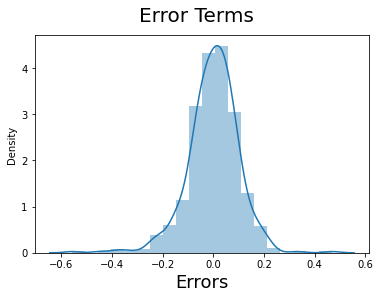

In [542]:
#Checking Assumption of Normality:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [543]:
X_train_sm.head()

,const,yr,holiday,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,spring,3,5,6
653,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0
576,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,1,0,0,0,0,0,1,1,0,0
728,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0
482,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [544]:
print(X_train_sm.shape)
print(res.shape)

(510, 14)
(510,)


# Step-6 : Prediction and Evaluation on Test set

In [546]:
#Scaling the test data

num_vars=['atemp','temp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [547]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,3,4,5,6,7,8,9,10,11,12
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.255708,0.264840,...,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.437258,0.442259,...,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [548]:
#creating x and y sets
y_test = df_test.pop('cnt')
X_test = df_test

In [549]:
X_train_new = X_train_sm.drop(['const'], axis=1)

In [550]:
X_train_new.head()

,yr,holiday,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,spring,3,5,6
653,1,0,0,0,0,0,0,1,0,0,0,0,0
576,1,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0,1,0,0,0,0,1,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [551]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [552]:
X_train_sm.columns

Index([                                              'const',
                                                        'yr',
                                                   'holiday',
       'Light_Snow_Light Rain_Thunderstorm_Scattered clouds',
                                           'Mist_Few_Clouds',
                                                    'Sunday',
                                                           8,
                                                           9,
                                                          10,
                                                           7,
                                                    'spring',
                                                           3,
                                                           5,
                                                           6],
      dtype='object')

In [553]:
X_train_sm.head()

,const,yr,holiday,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,spring,3,5,6
653,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0
576,1.0,1,0,0,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,1,0,0,0,0,0,1,1,0,0
728,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0
482,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [554]:
#making predictions on the chosen model
y_pred = lr_model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

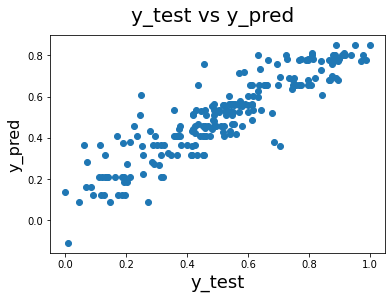

In [555]:
#CHECKING PREDICTED V/s TEST DATA 

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

- We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.


In [556]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [557]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.10573120032920406

In [558]:
#calculate the r square for test

r_squared = r2_score(y_test, y_pred)
r_squared

0.8029017439604782

- R square of our model is 0.797

In [559]:
X_t=X_train_new.iloc[:,0].values

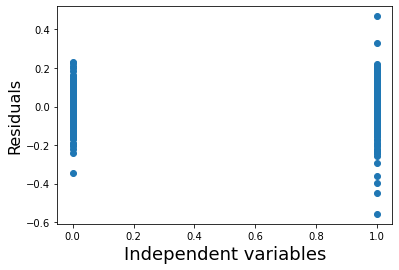

In [560]:
#PLotting the residuals to see if a pattern exists
#Checking assumption of homoscedasticity and autocorrelation
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

- When we have time series data (e.g. yearly data), then the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [561]:
X_train_new.head()

,yr,holiday,Light_Snow_Light Rain_Thunderstorm_Scattered clouds,Mist_Few_Clouds,Sunday,8,9,10,7,spring,3,5,6
653,1,0,0,0,0,0,0,1,0,0,0,0,0
576,1,0,0,0,0,0,0,0,1,0,0,0,0
426,1,0,0,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0,1,0,0,0,0,1,0,0,0
482,1,0,0,1,0,0,0,0,0,0,0,0,0


In [562]:
print(X_train_sm.columns)
print(lr_model.summary())

Index([                                              'const',
                                                        'yr',
                                                   'holiday',
       'Light_Snow_Light Rain_Thunderstorm_Scattered clouds',
                                           'Mist_Few_Clouds',
                                                    'Sunday',
                                                           8,
                                                           9,
                                                          10,
                                                           7,
                                                    'spring',
                                                           3,
                                                           5,
                                                           6],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                

# We can see that the equation for best fitted line is:

- cnt = 0.246 X yr - 0.083 X holiday - 0.321 X Light_Snow_Light Rain_Thunderstorm_Scattered clouds - 0.090 X Mist_Few_Clouds -0.049 X Sunday +0.153 X 8 + 0.193 X 9 + 0.116 X 10 + 0.126 X 7 -  0.198 X Spring  +0.063 X 3 + 0.123  X 5 +0.148 X 6     

## We can see the demand for bikes depends mainly on below variables:

- yr , holiday ,Spring, Mist_Cloudy, Light rain_Light snow_Thunderstorm,3 ,5 ,6, 8, 9, sunday, 7, 10
- Demands increases in the month of  3, 5, 6, 8 ,9, 7 , 10  and yr
- Demand decreases if it is holiday , Spring, Light_Snow_Light Rain_Thunderstorm_Scattered clouds,  Mist_Few_Clouds , Sunday

## Final recommendations for the company:

- Company should focus on expanding business during Spring.
- Company should focus on expanding business during September.
- Bikes demand increases in the month 3, 5, 6, 8 ,9, 7 ,10 and yr
- There would be less bookings during Light_Snow_Light Rain_Thunderstorm_Scattered clouds and Mist_Few_Clouds, they could probably use this time to serive the bikes without having business impact.